In [13]:
# Import required packages for prediction using SVM
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [14]:
dataset1 = 'Small_Datasets/2-wayEpi_100feat.txt'
dataset2 = 'Small_Datasets/4-wayAdditive_100feat.txt'
dataset3 = 'Small_Datasets/2Additive_2-wayEpi_100feat.txt'
dataset4 = 'Small_Datasets/4-wayHeterogeneous_100feat.txt'
df = pd.read_csv(dataset1, sep='\t', )

In [15]:
# Setup the data to calculate the odds ratio
df = df.dropna()
X = df.drop(columns=['Class'])
y = df['Class']
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [16]:
# Use SVM to predict the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define hyperparameters for the SVM model

# 1. Linear Kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# 2. Polynomial Kernel
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# 3. RBF Kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# clf = SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Confusion Matrix:')
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.505
Confusion Matrix:
[[54 50]
 [49 47]]
Accuracy: 0.495
Confusion Matrix:
[[56 48]
 [53 43]]
Accuracy: 0.43
Confusion Matrix:
[[46 58]
 [56 40]]


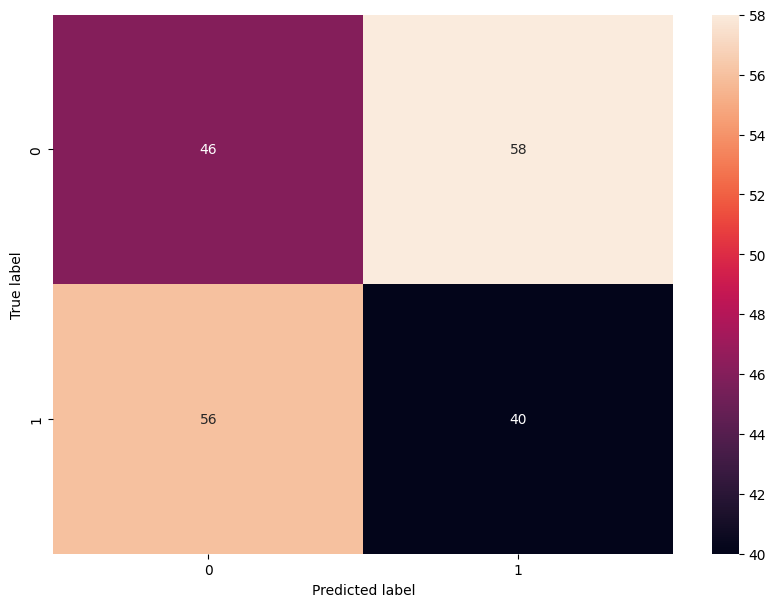

In [17]:
# Draw the confusion matrix using seaborn
# Predicted label and true label in the confusion matrix
#
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

